In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3


In [2]:
proteomics_t_test = pd.read_csv('data/proteomics_t_tests.csv')
proteomics_t_test['Cancer'] = [cancer.lower() for cancer in proteomics_t_test.Cancer]
transcriptomics_t_test = pd.read_csv('data/transcriptomics_t_tests.csv')
transcriptomics_t_test.Cancer = [cancer.lower() for cancer in transcriptomics_t_test.Cancer]
delta_corr_pvals = pd.read_csv('data/full_10k_permutation_corrected.csv')
delta_corr_pvals = delta_corr_pvals.replace('en', 'endometrial')
delta_corr_pvals = delta_corr_pvals.melt(id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')
delta_corr_pvals = delta_corr_pvals.dropna()

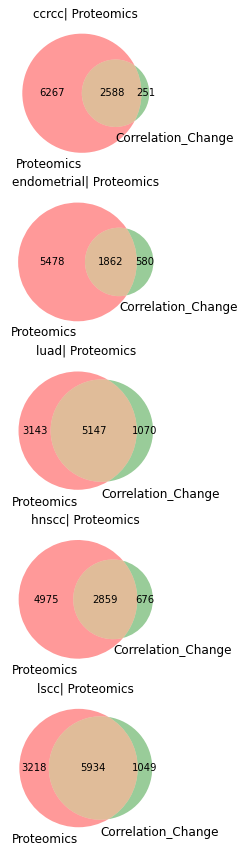

In [3]:
#proteomics comparison
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (5,15))
i = 0
for cancer in pd.unique(proteomics_t_test.Cancer):
    sig_prot = proteomics_t_test[proteomics_t_test.Cancer == cancer]
    sig_corr = delta_corr_pvals[delta_corr_pvals.Cancer == cancer]
    sig_prot = set(sig_prot[sig_prot.qval < 0.05].Gene)
    sig_corr = set(sig_corr[sig_corr.perm_pval < 0.05].Gene)
    venn2([sig_prot, sig_corr], ('Proteomics', 'Correlation_Change'), ax = ax[i])
    ax[i].set_title(cancer + '| Proteomics')
    i +=1


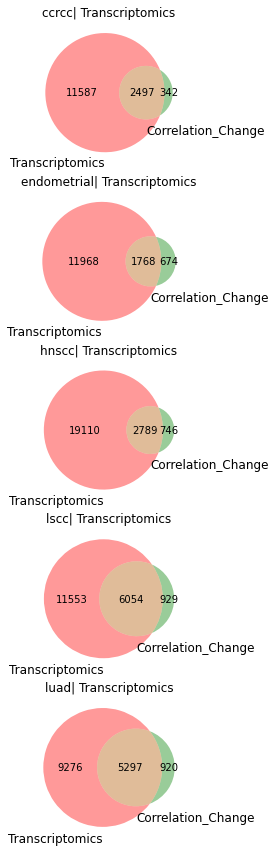

In [4]:
#transcriptomics comparison
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (5,15))
i = 0
for cancer in pd.unique(transcriptomics_t_test.Cancer):
    sig_trans = transcriptomics_t_test[transcriptomics_t_test.Cancer == cancer]
    sig_corr = delta_corr_pvals[delta_corr_pvals.Cancer == cancer]
    sig_trans = set(sig_trans[sig_trans.qval < 0.05].Gene)
    sig_corr = set(sig_corr[sig_corr.perm_pval < 0.05].Gene)
    venn2([sig_trans, sig_corr], ('Transcriptomics', 'Correlation_Change'), ax = ax[i])
    ax[i].set_title(cancer + '| Transcriptomics')
    i +=1


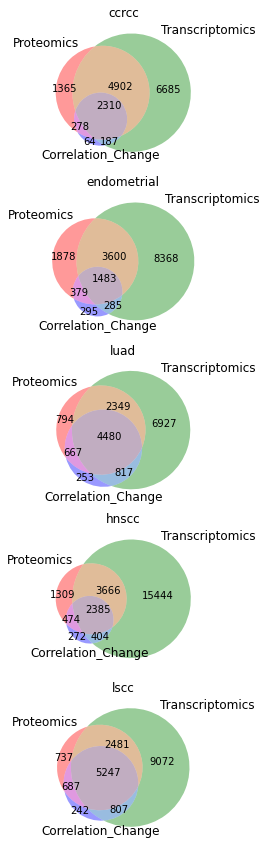

In [5]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (5,15))
i = 0
for cancer in pd.unique(delta_corr_pvals.Cancer):
    sig_prot = proteomics_t_test[proteomics_t_test.Cancer == cancer]
    sig_trans = transcriptomics_t_test[transcriptomics_t_test.Cancer == cancer]   
    sig_corr = delta_corr_pvals[delta_corr_pvals.Cancer == cancer]
    sig_prot = set(sig_prot[sig_prot.qval < 0.05].Gene)
    sig_trans = set(sig_trans[sig_trans.qval < 0.05].Gene)
    sig_corr = set(sig_corr[sig_corr.perm_pval < 0.05].Gene)
    ax[i].set_title(cancer)
    venn3([sig_prot, sig_trans, sig_corr], ('Proteomics', 'Transcriptomics', 'Correlation_Change'), ax = ax[i])
    i +=1
